In [8]:
import pandas as pd

# Load the dataset
df = pd.read_excel('rearranged_data.xlsx', index_col='Date')
df.index = pd.to_datetime(df.index)
# print(df.head())
# Drop the 'returns' column from the DataFrame
df = df.drop(columns=['returns'])

# Display the first few rows of the modified dataframe to confirm the drop
print(df.head())

                PCA1      PCA2      PCA3      PCA4      PCA5     Adj Close  \
Date                                                                         
2019-01-02  0.925255  3.117047  0.553387  2.030069 -0.751399  10792.500000   
2019-01-03  0.924367  3.260648  1.021336  2.051204 -0.897440  10672.250000   
2019-01-04  0.995289  2.551136 -2.447917  2.267130  1.003026  10727.349609   
2019-01-07  0.890086  2.757490 -1.231058  2.131883 -0.383071  10771.799805   
2019-01-08  0.929015  2.891203 -0.526117  2.129028  0.902577  10802.150391   

            returns_direction  
Date                           
2019-01-02                  1  
2019-01-03                  0  
2019-01-04                  1  
2019-01-07                  1  
2019-01-08                  1  


           Date          Open          High           Low         Close  \
0    2019-01-02  10868.849609  10895.349609  10735.049805  10792.500000   
1    2019-01-03  10796.799805  10814.049805  10661.250000  10672.250000   
2    2019-01-04  10699.700195  10741.049805  10628.650391  10727.349609   
3    2019-01-07  10804.849609  10835.950195  10750.150391  10771.799805   
4    2019-01-08  10786.250000  10818.450195  10733.250000  10802.150391   
...         ...           ...           ...           ...           ...   
1269 2024-02-21  22248.849609  22249.400391  21997.949219  22055.050781   
1270 2024-02-22  22081.550781  22252.500000  21875.250000  22217.449219   
1271 2024-02-23  22290.000000  22297.500000  22186.099609  22212.699219   
1272 2024-02-26  22169.199219  22202.150391  22075.150391  22122.050781   
1273 2024-02-27  22090.199219  22218.250000  22085.650391  22198.349609   

         Adj Close  Volume    SENSEX       SPX   USD_INR  ...     NFYt2  \
0     10792.500000  3097

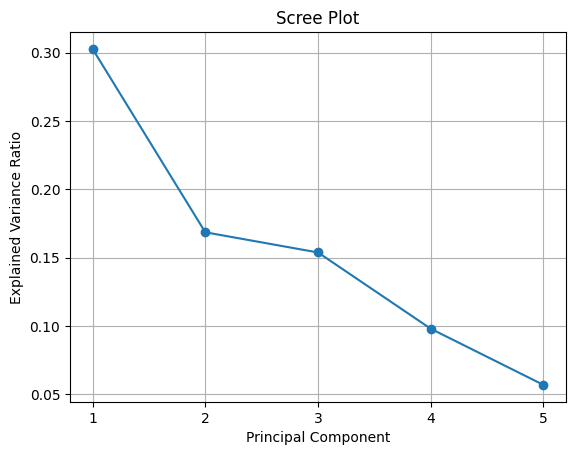

Loadings for Principal Components:
       Open      High       Low     Close    Volume    SENSEX       SPX  \
0 -0.365573 -0.365363 -0.366086 -0.365619  0.294705 -0.000736  0.000347   
1 -0.136524 -0.139265 -0.136576 -0.139925  0.045846 -0.139419 -0.049945   
2  0.034508  0.029414  0.026538  0.020803  0.005290 -0.518151 -0.236450   
3 -0.178567 -0.176298 -0.178511 -0.176779 -0.083138  0.045232  0.021101   
4  0.006114  0.005913  0.003510  0.004001 -0.010362 -0.068834  0.489914   

    USD_INR   GBP_INR  NIFTY_BANK  ...     NFYt2     NFYt3     NFYt4  \
0  0.000557 -0.219596   -0.003924  ... -0.004649 -0.005384 -0.005372   
1 -0.062307 -0.224789   -0.137004  ... -0.010832 -0.022390 -0.012761   
2 -0.302283  0.024393   -0.494772  ...  0.042864 -0.025115  0.004731   
3 -0.018585 -0.428469    0.047363  ... -0.075335 -0.060856 -0.075388   
4 -0.066375  0.021895   -0.111517  ... -0.401431  0.589956 -0.471502   

       T-91     T-182     T-364      FBIL       TE1       TE2       TE3  
0 -0.25

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_excel('dataM23.xlsx')
print(df)

# Step 2: Data Preprocessing
# Drop columns that are not needed for PCA
df.drop(columns=['Adj Close'], inplace=True)

# Handle missing values if any
df.dropna(inplace=True)

# Extract the date column and drop it from the dataframe
date_column = df['Date']
df.drop(columns=['Date'], inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Perform PCA with 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_scaled)

# Step 4: Create a new DataFrame with PCA components and date column
columns = ['Date', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']
data = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])
data['Date'] = date_column

# Step 5: Save the new DataFrame to a new Excel file
data.to_excel('pca_result.xlsx', index=False)


#  Plot the explained variance ratio (Scree Plot)
plt.figure()
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

# Step 6: Interpretation of Principal Components
# Get the loadings (coefficients) of each original feature for each principal component
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, columns=df.columns)

# Display the loadings for each principal component
print("Loadings for Principal Components:")
print(loadings_df)

# Identify the features with the highest absolute loadings for each principal component
top_features = []
for i in range(len(loadings)):
    top_feature_idx = loadings_df.iloc[i].abs().argsort()[-3:][::-1]
    top_features.append(df.columns[top_feature_idx].values)
    print(f"Top features for PCA{i+1}: {top_features[i]}")


           Date          Open          High           Low         Close  \
0    2019-01-02  10868.849609  10895.349609  10735.049805  10792.500000   
1    2019-01-03  10796.799805  10814.049805  10661.250000  10672.250000   
2    2019-01-04  10699.700195  10741.049805  10628.650391  10727.349609   
3    2019-01-07  10804.849609  10835.950195  10750.150391  10771.799805   
4    2019-01-08  10786.250000  10818.450195  10733.250000  10802.150391   
...         ...           ...           ...           ...           ...   
1269 2024-02-21  22248.849609  22249.400391  21997.949219  22055.050781   
1270 2024-02-22  22081.550781  22252.500000  21875.250000  22217.449219   
1271 2024-02-23  22290.000000  22297.500000  22186.099609  22212.699219   
1272 2024-02-26  22169.199219  22202.150391  22075.150391  22122.050781   
1273 2024-02-27  22090.199219  22218.250000  22085.650391  22198.349609   

         Adj Close  Volume    SENSEX       SPX   USD_INR  ...     NFYt2  \
0     10792.500000  3097

C:\Users\Partha Sakha Paul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 4.0338 - val_loss: 4.4353
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7349 - val_loss: 3.4851
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6285 - val_loss: 2.1912
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3553 - val_loss: 1.7005
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1143 - val_loss: 1.6027
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9856 - val_loss: 1.5751
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1202 - val_loss: 1.5679
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9383 - val_loss: 1.5654
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9501 - val_loss: 1.5569
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0878 - val_loss: 1.5505
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9915 - val_loss: 1.5604
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2639 - val_l

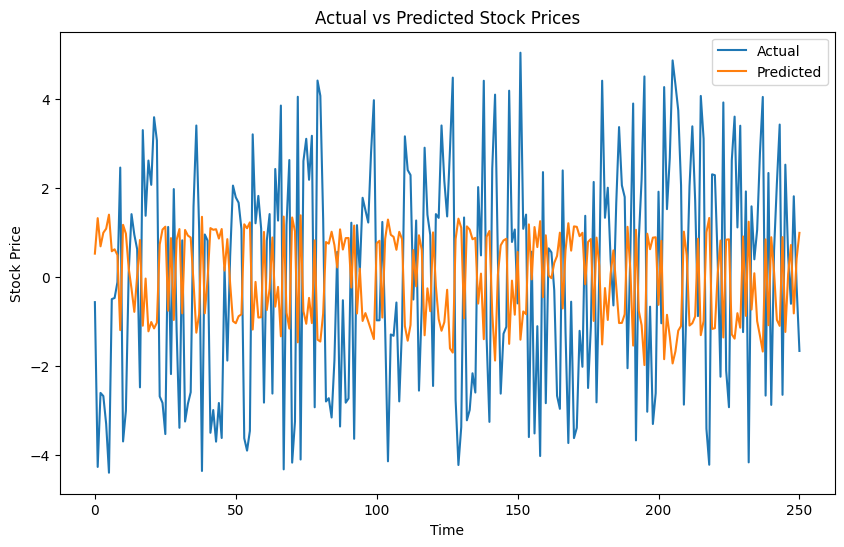

Training Loss:
[4.101964473724365, 3.4425978660583496, 2.258420944213867, 1.3210749626159668, 1.0453888177871704, 1.006752371788025, 0.9972367882728577, 0.98806232213974, 1.0200203657150269, 0.9730747938156128, 0.9638422131538391, 0.9661934971809387, 0.9738367199897766, 0.9652257561683655, 0.9589768648147583, 0.9749666452407837, 0.9658851027488708, 0.9506878852844238, 0.9445046186447144, 0.9607225656509399, 0.938443660736084, 0.9512472748756409, 0.9347214698791504, 0.9283066987991333, 0.9396076202392578, 0.9308202266693115, 0.9207505583763123, 0.9359052777290344, 0.9759448766708374, 0.9230288863182068, 0.9094526171684265, 0.9102056622505188, 0.9116116166114807, 0.9407612681388855, 0.9134542942047119, 0.9228419661521912, 0.9195688962936401, 0.9320093989372253, 0.9399000406265259, 0.8949751257896423, 0.9016401171684265, 0.9079738259315491, 0.9020674824714661, 0.9351235032081604, 0.8870446085929871, 0.8895058631896973, 0.8932952284812927, 0.8881655931472778, 0.8997887372970581, 0.88878351

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_excel('Venky')
print(df)

# Step 2: Data Preprocessing
# Drop columns that are not needed for PCA
df.drop(columns=['Adj Close'], inplace=True)

# Handle missing values if any
df.dropna(inplace=True)

# Extract the date column and drop it from the dataframe
date_column = df['Date']
df.drop(columns=['Date'], inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Perform PCA with desired components
n_components = 3  # Number of components to keep
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    principal_components[:-1], principal_components[1:], test_size=0.2, random_state=42)

# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Step 5: Build and train RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=n_components))  # Output layer with PCA components

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Capture training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Step 6: Forecast using the trained model
predicted_components = model.predict(X_test)

# Step 7: Inverse PCA transformation
predicted_features = pca.inverse_transform(predicted_components)

# Step 8: Plot actual vs predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 0], label='Actual')
plt.plot(predicted_features[:, 0], label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print training history
print("Training Loss:")
print(training_loss)
print("\nValidation Loss:")
print(validation_loss)
